In [1]:
import numpy as np
import scipy.linalg as la
from matplotlib import pyplot as plt
from scipy import sparse as sp
from time import time
import scipy.sparse.linalg as spla
from math import sqrt
import simulated_data as simd
import data_strm_subclass as dssb
import streaming_subclass as stsb
import plot_functions as pf
import pickle

In [2]:
def expvar(X, W, xnorm2=None):
    '''
    Calculate the explained variance of X
    Inputs:
        X: n x d array-like
        W: d x k array-like
        xnorm2: optional float, the squared frobenius norm of X. This is often
            calculated in other applications and can thus be provided.
    '''
    
    if xnorm2 is None:
        xnorm2 = la.norm(X, ord='fro')**2
    return la.norm(X.dot(W), ord='fro')**2 / xnorm2

# Synthetic Data

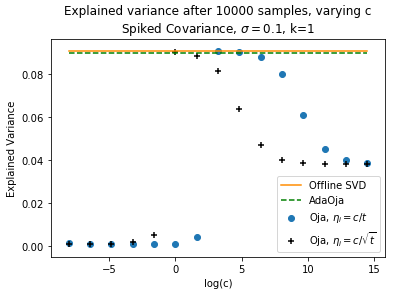

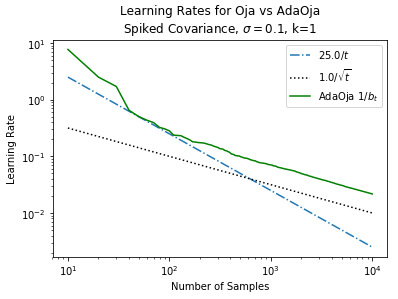

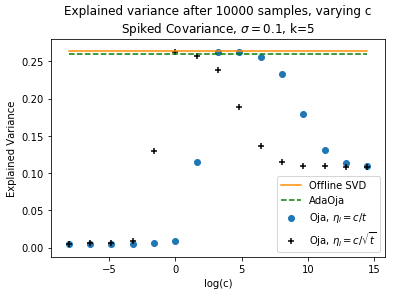

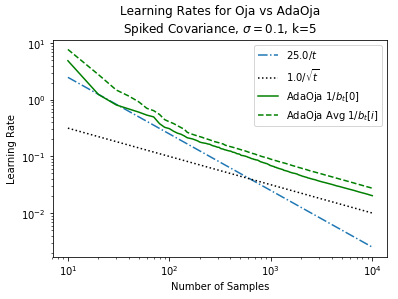

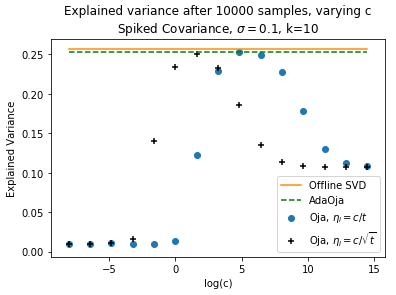

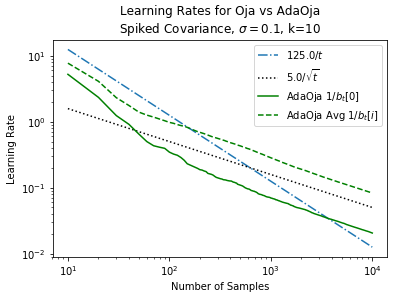

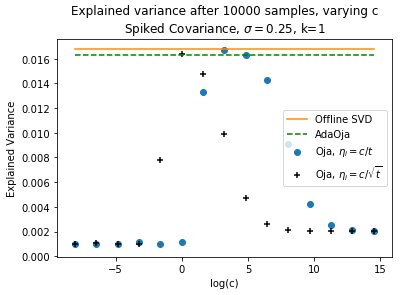

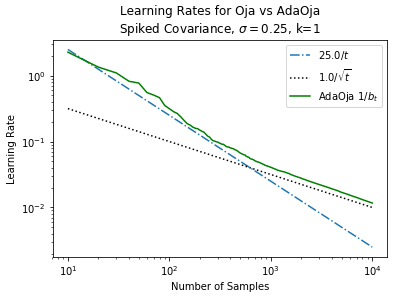

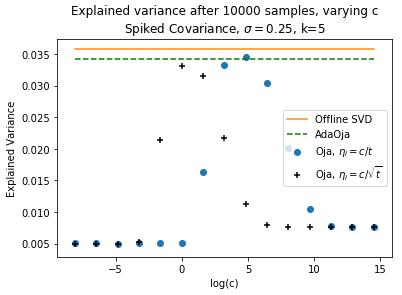

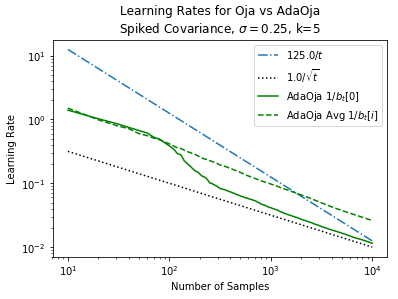

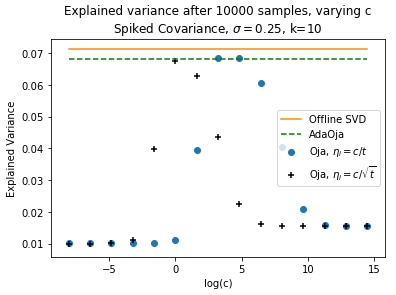

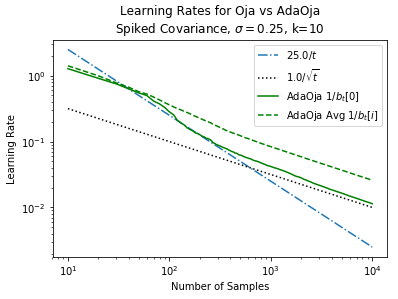

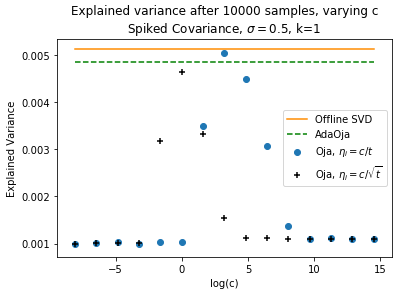

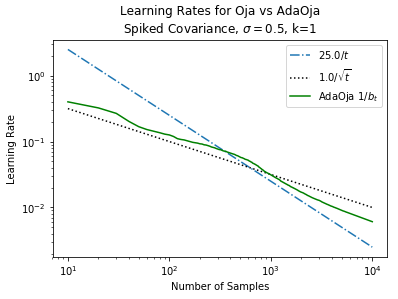

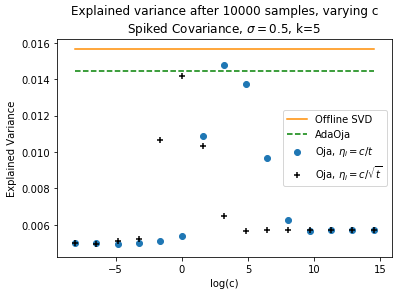

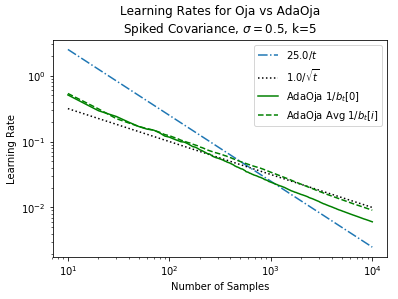

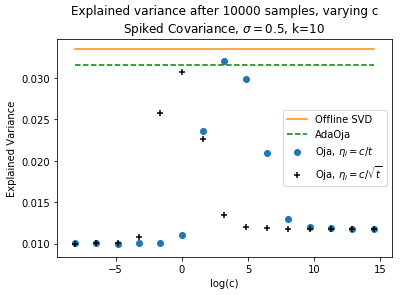

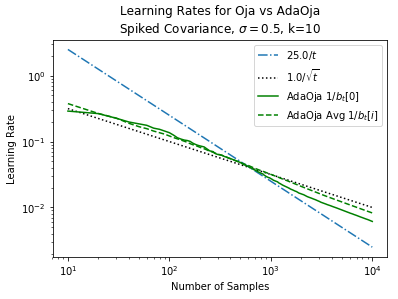

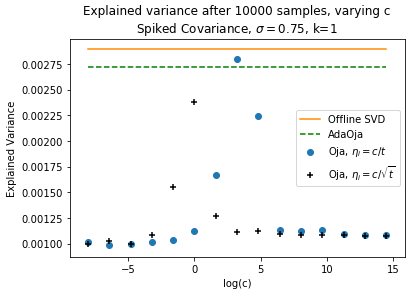

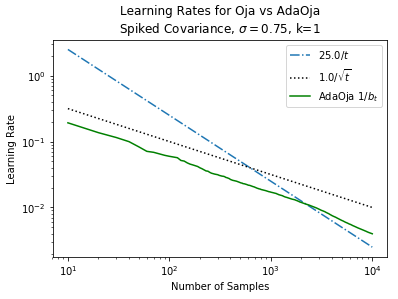

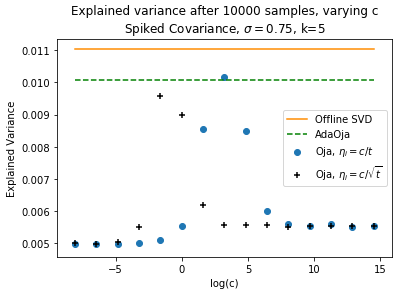

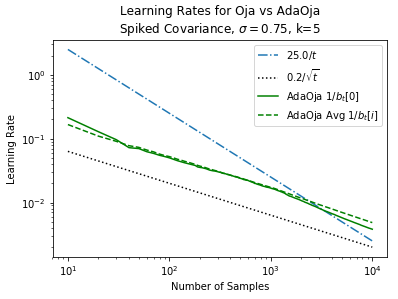

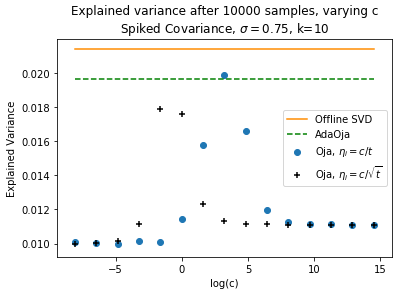

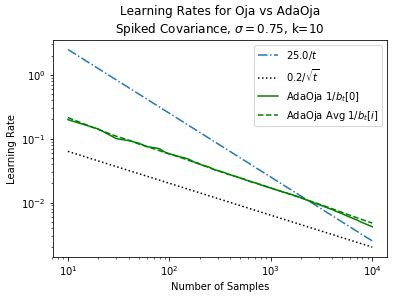

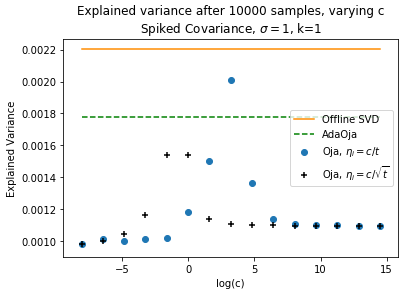

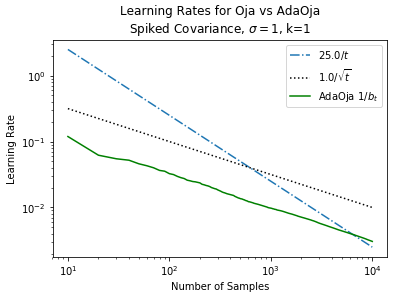

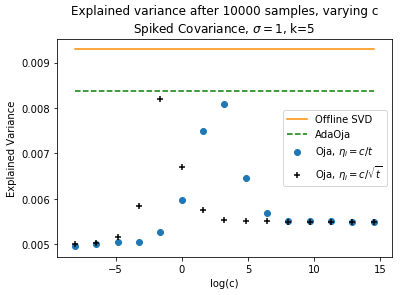

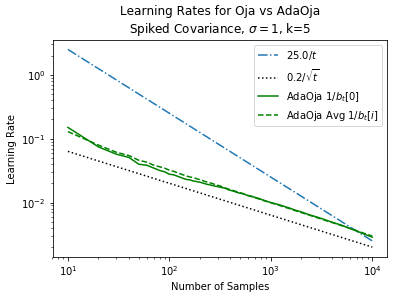

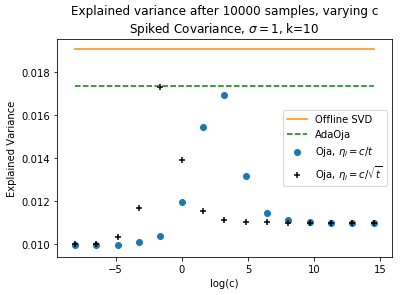

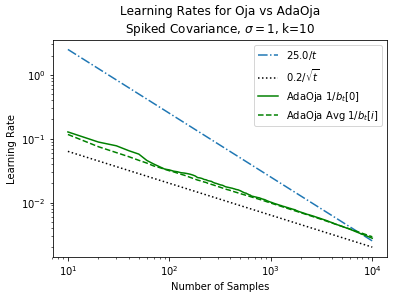

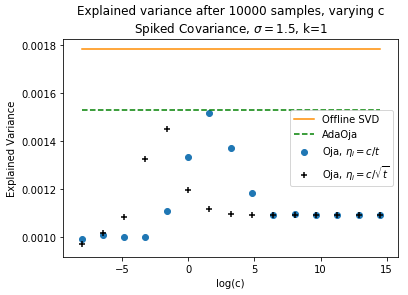

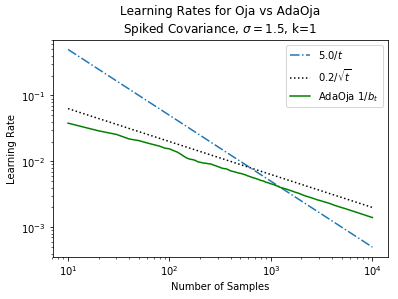

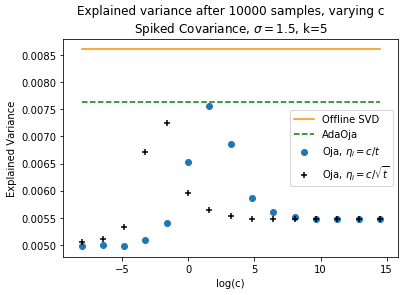

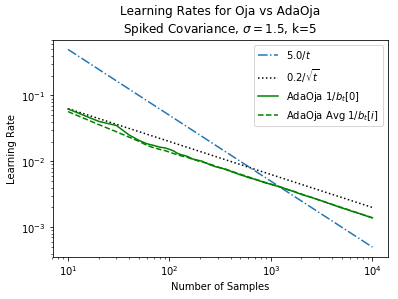

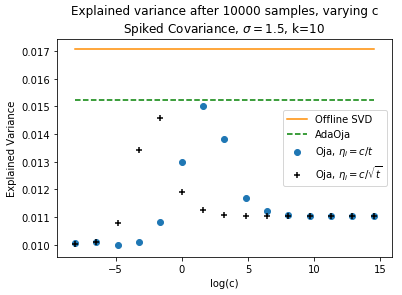

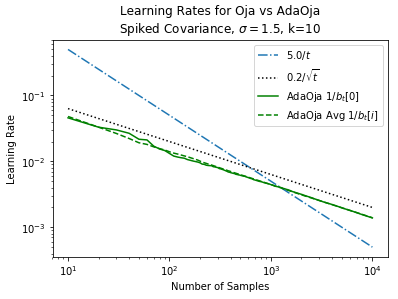

In [3]:
# Compare the final explained variance achieved by Oja's method for 
# eta_i = c/t, c/sqrt(t) to AdaOja and the offline explained variance

# Initialize parameters
n = 10000
B = 10
d = 1000
num_acc = 100

# Initialize learning rate comparison object for spiked covariance model
spcov_lr = pf.compare_lr(base=5., lower=-5., upper=10.)
for sigma in [.1, .25, .5, .75, 1, 1.5]:
    for k in [1, 5, 10]:
        cov, w, A0, X = simd.spiked_covariance(n, d, k, sigma=sigma)
        V = la.eigh(np.cov(X.T))[1][:,::-1][:,:k]
        true_evar = expvar(X, V)
        spcov_lr.run_cval_fullX(X, k, B, Sparse=False)
        dataname = r'Spiked Covariance, $\sigma=$' + str(sigma) + ', k=' + str(k)
        spcov_lr.plot_cval_acc(dataname, 'spcov_sig' + str(sigma).replace(".","") + "_k" + str(k) + "cvals.svg", true_evar=true_evar)
        spcov_lr.plot_bvals(dataname, "spcov_sig" + str(sigma).replace(".","") + "_k" + str(k) + "lr.svg")
        

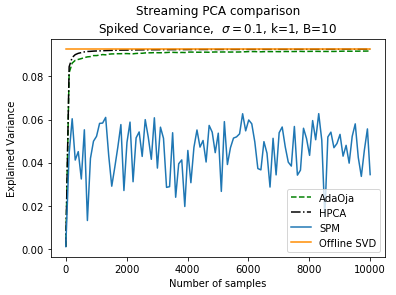

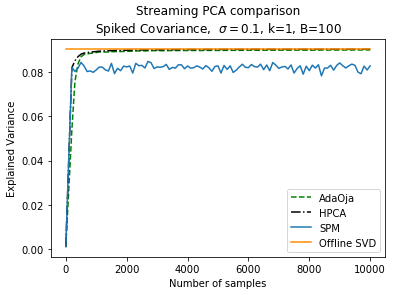

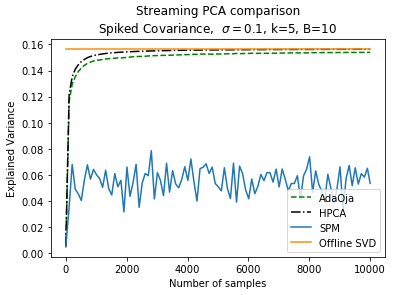

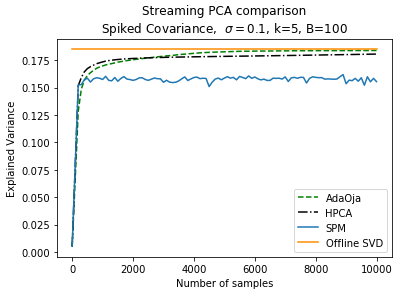

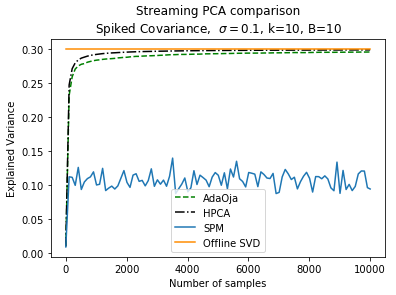

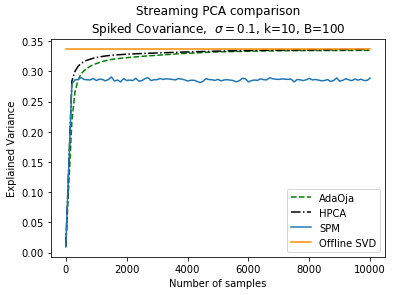

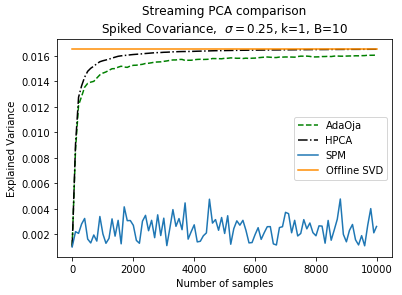

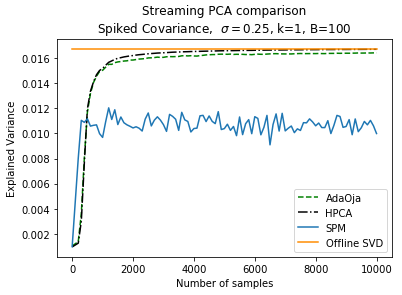

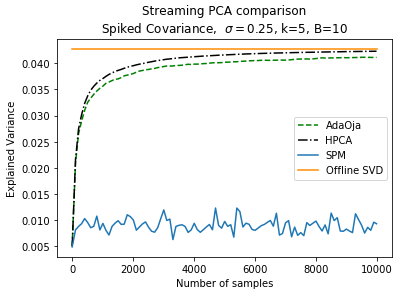

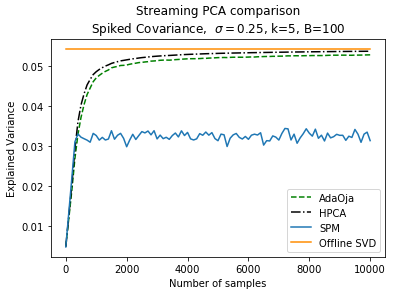

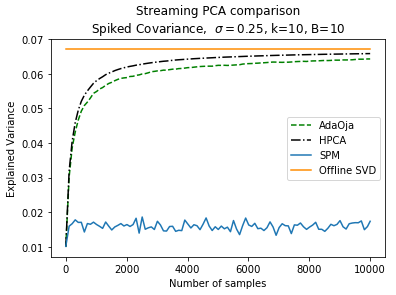

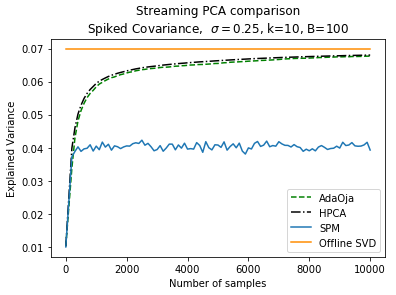

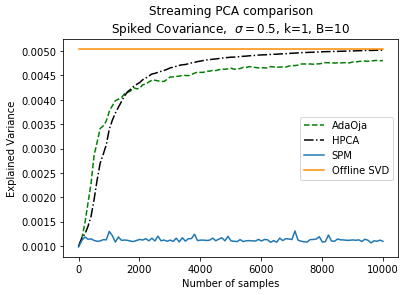

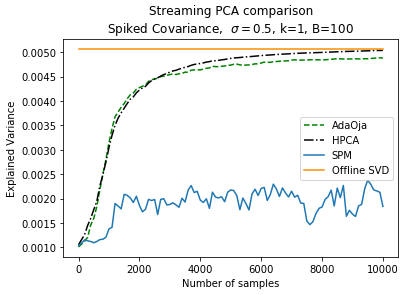

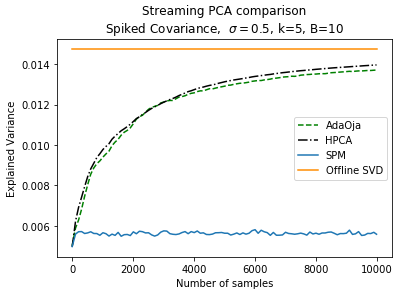

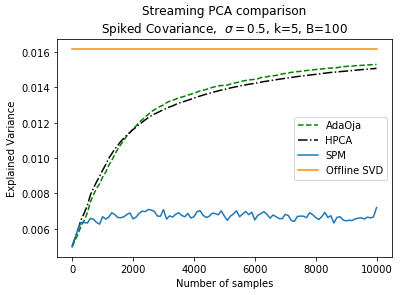

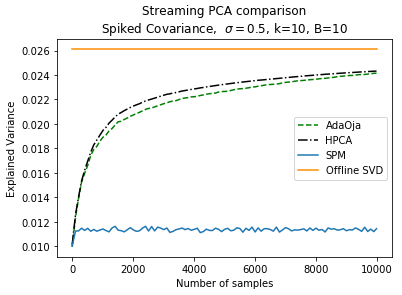

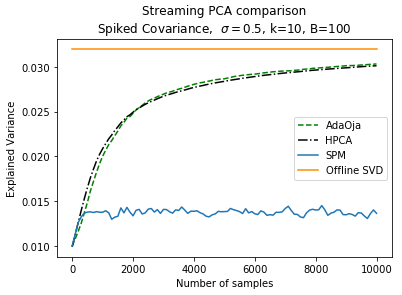

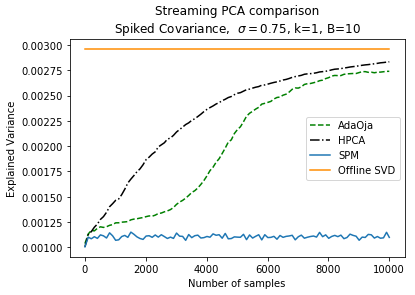

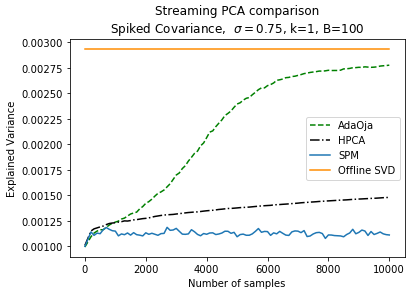

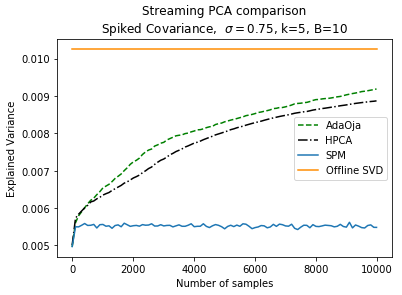

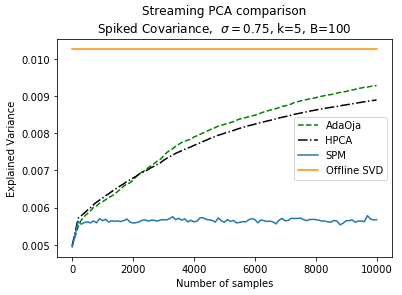

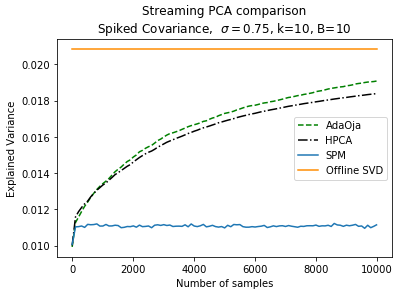

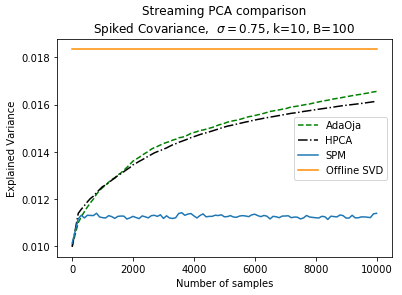

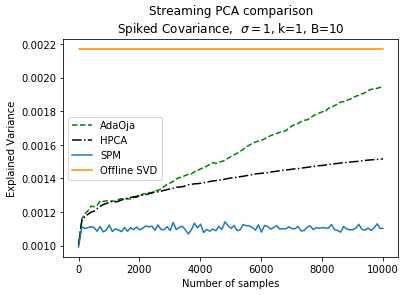

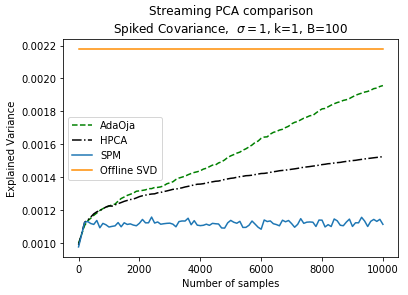

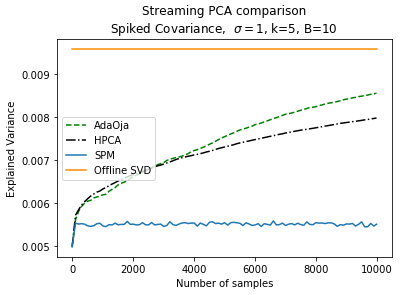

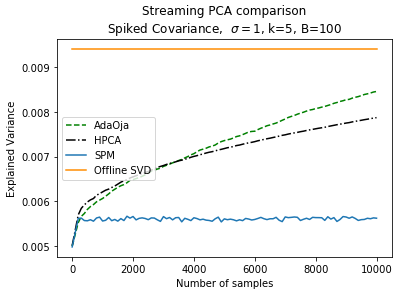

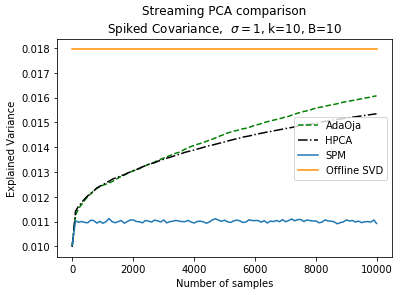

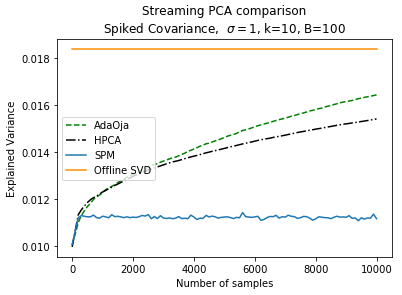

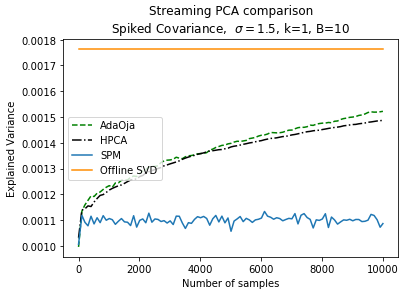

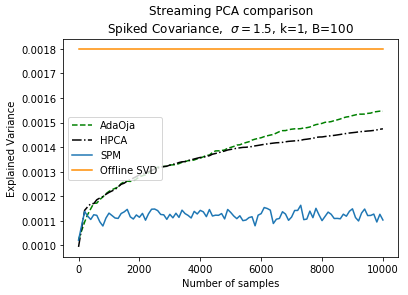

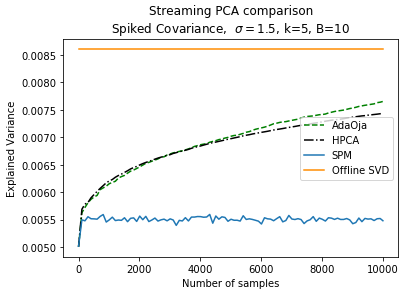

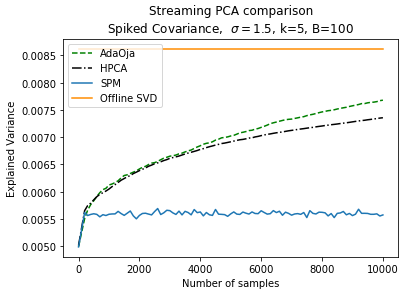

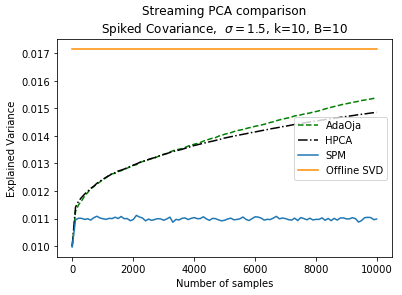

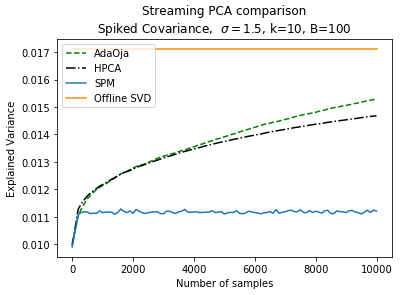

In [4]:
# Compare the convergence of the explained variance for AdaOja, HPCA, and 
# SPM--varying sigma (noise), k (number of vectors) and B (blocksize)
for sigma in [.1, .25, .5, .75, 1, 1.5]:
    for k in [1, 5, 10]:
        for B in [10, 100]:
            cov, w, A0, X = simd.spiked_covariance(n, d, k, sigma=sigma)
            ada_cov, hpca_cov, spm_cov = dssb.run_sim_fullX(X, k, B=B, Sparse=False)
            V = la.eigh(np.cov(X.T))[1][:,::-1][:,:k]
            true_evar = expvar(X, V)
            figname = 'Expvarcomp_' + 'spcov_k' + str(k) + 's'+ str(sigma).replace(".","") + '_B' + str(B) + '.svg'
            pf.plot_hpca_ada(ada_cov, hpca_cov, spm_cov, dataname = 'Spiked Covariance, ' +  r' $\sigma=$' + str(sigma), figname=figname, true_evar = true_evar)

# Small Bag of Words Data


In [6]:
# Set parameters
k = 10
B = 10

In [7]:
# Load Small bag of words data
kos_n, kos_d, kos_nnz, kos_dense, kos_SpX, kos_norm2 = dssb.get_bagX('docword.kos.txt') 
nips_n, nips_d, nips_nnz, nips_dense, nips_SpX, nips_norm2 = dssb.get_bagX('docword.nips.txt')
enr_n, enr_d, enr_nnz, enr_dense, enr_SpX, enr_norm2 = dssb.get_bagX('docword.enron.txt')

In [8]:
# Obtain true ExpVar for Small Bag-of-words data
v_kos = spla.svds((kos_SpX.T.dot(kos_SpX)).astype(float), k=k)[2].T
kos_expvar = la.norm(kos_SpX.dot(v_kos), ord='fro')**2 / kos_norm2

v_nips = spla.svds((nips_SpX.T.dot(nips_SpX)).astype(float), k=k)[2].T
nips_expvar = la.norm(nips_SpX.dot(v_nips), ord='fro')**2 / nips_norm2

v_enr = spla.svds((enr_SpX.T.dot(enr_SpX)).astype(float), k=k)[2].T
enr_expvar = la.norm(enr_SpX.dot(v_enr), ord='fro')**2 / enr_norm2

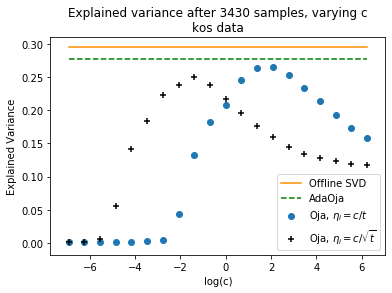

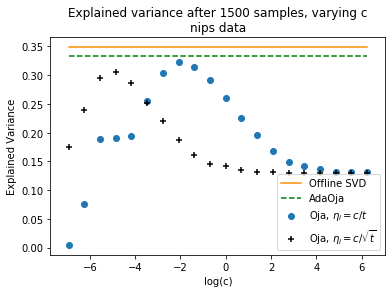

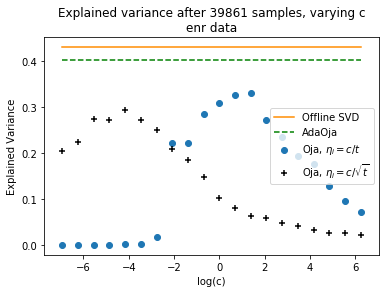

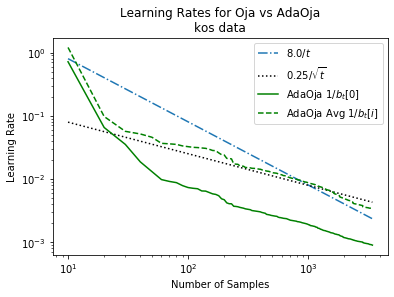

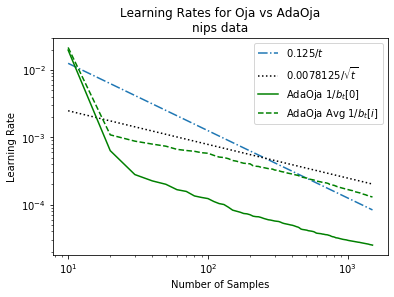

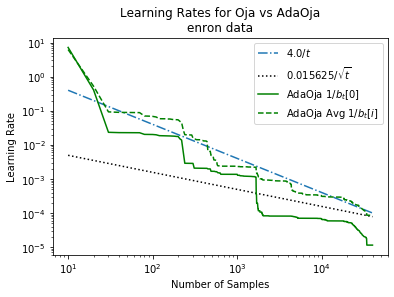

In [9]:
# Create learning rate comparison objects
kos_lr = pf.compare_lr()
nips_lr = pf.compare_lr()
enr_lr = pf.compare_lr()

# Run multiple c values for Oja vs AdaOja
kos_lr.run_cval_bag('docword.kos.txt', k, B=B, X=kos_SpX, xnorm2=kos_norm2)
nips_lr.run_cval_bag('docword.nips.txt', k, B=B, X=nips_SpX, xnorm2=nips_norm2)
enr_lr.run_cval_bag('docword.enron.txt', k, B=B, X=enr_SpX, xnorm2=enr_norm2)

# Plot the cval accuracies for each
kos_lr.plot_cval_acc('kos data', 'kos_cvals.svg', true_evar=kos_expvar)
nips_lr.plot_cval_acc('nips data', 'nips_cvals.svg', true_evar=nips_expvar)
enr_lr.plot_cval_acc('enr data', 'enr_cvals.svg', true_evar=enr_expvar)

# Plot the best case learning rate comparisons for each
kos_lr.plot_bvals('kos data', 'kos_lr.svg')
nips_lr.plot_bvals('nips data', 'nips_lr.svg')
enr_lr.plot_bvals('enron data', 'enr_lr.svg')

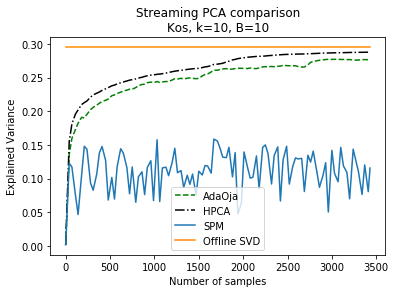

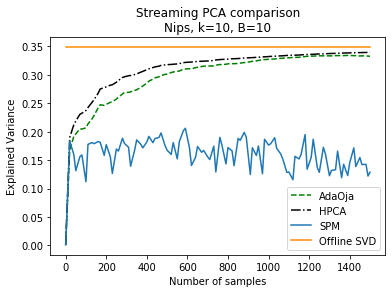

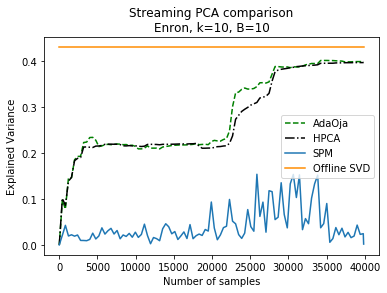

Number of accuracy readings is greater than the number of samples. Setting num_acc to int(n/B)
Number of accuracy readings is greater than the number of samples. Setting num_acc to int(n/B)
Number of accuracy readings is greater than the number of samples. Setting num_acc to int(n/B)
Number of accuracy readings is greater than the number of samples. Setting num_acc to int(n/B)
Number of accuracy readings is greater than the number of samples. Setting num_acc to int(n/B)
Number of accuracy readings is greater than the number of samples. Setting num_acc to int(n/B)


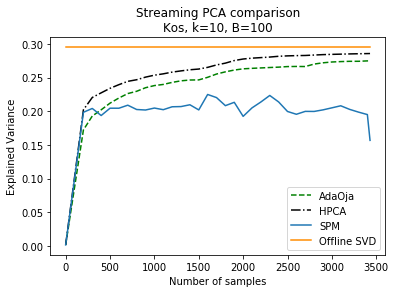

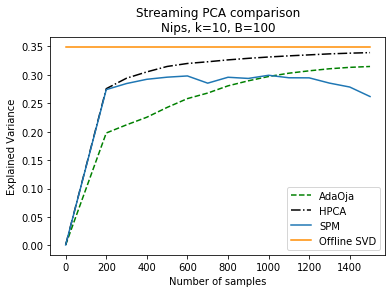

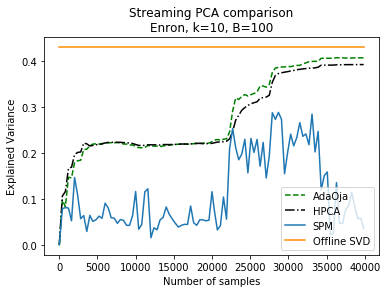

In [10]:
# Plot comparison of AdaOja, HPCA and SPM convergence (varying B)
for B in [10, 100]:
    adaoja_kos, hpca_kos, spm_kos = dssb.run_sim_bag('docword.kos.txt', k, B=B, X=kos_SpX, xnorm2=kos_norm2)
    adaoja_nips, hpca_nips, spm_nips = dssb.run_sim_bag('docword.nips.txt', k, B=B, X=nips_SpX, xnorm2=nips_norm2)
    adaoja_enr, hpca_enr, spm_enr = dssb.run_sim_bag('docword.enron.txt', k, B=B, X=enr_SpX, xnorm2=enr_norm2)

    pf.plot_hpca_ada(adaoja_kos, hpca_kos, spm_kos, 'Kos', true_evar=kos_expvar)
    pf.plot_hpca_ada(adaoja_nips, hpca_nips, spm_nips, 'Nips', true_evar=nips_expvar)
    pf.plot_hpca_ada(adaoja_enr, hpca_enr, spm_enr, 'Enron', true_evar=enr_expvar)

In [11]:
adaoja_kos, hpca_kos, spm_kos = dssb.run_sim_bag('docword.kos.txt', k, B=10, X=kos_SpX, xnorm2=kos_norm2)
adaoja_nips, hpca_nips, spm_nips = dssb.run_sim_bag('docword.nips.txt', k, B=10, X=nips_SpX, xnorm2=nips_norm2)

In [12]:
print(adaoja_kos.accQ[-1])
print(adaoja_nips.accQ[-1])

0.2769385879974887
0.3308906196581517


# Large Bag of Words Data

In [16]:
B = 1000
k = 10
nyt_n, nyt_d, nyt_nnz, nyt_dense, nyt_SpX, nyt_norm2 = dssb.get_bagXblocks('docword.nytimes.txt', B)

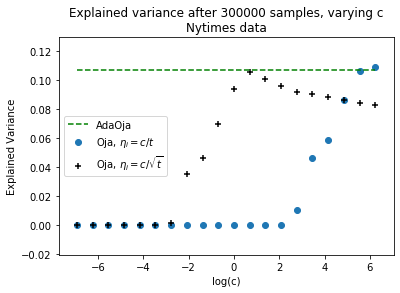

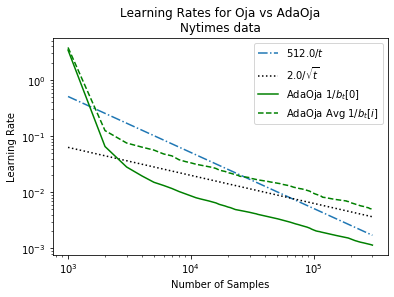

In [17]:
nyt_lr = pf.compare_lr()
nyt_lr.run_cval_blocklist(nyt_SpX, k, xnorm2=nyt_norm2)
nyt_lr.plot_cval_acc('Nytimes data', 'nyt_cvals.svg')
nyt_lr.plot_bvals('Nytimes data', 'nyt_lr.svg')

In [ ]:
# Plot comparison of AdaOja, HPCA and SPM convergence for B=100
adaoja_nyt, hpca_nyt, spm_nyt = dssb.run_sim_blocklist(nyt_SpX, k, xnorm2=nyt_norm2)
pf.plot_hpca_ada(adaoja_nyt, hpca_nyt, spm_nyt, 'Nytimes')

In [15]:
# Plot comparison of AdaOja, HPCA and SPM convergence for B=1000
# Note it is faster to simply reload the dataset as a set of size 1000 blocks
B = 1000
nyt_n, nyt_d, nyt_nnz, nyt_dense, nyt_SpX, nyt_norm2 = dssb.get_bagXblocks('docword.nytimes.txt', B, block_total=100)
adaoja_nyt, hpca_nyt, spm_nyt = dssb.run_sim_blocklist(nyt_SpX, k, xnorm2=nyt_norm2)
pf.plot_hpca_ada(adaoja_nyt, hpca_nyt, spm_nyt, 'Nytimes')

NameError: name 'X' is not defined

In [18]:
pm_n, pm_d, pm_nnz, pm_dense, pm_SpX, pm_norm2 = dssb.get_bagXblocks('docword.pubmed.txt', B=1000, block_total=3000)

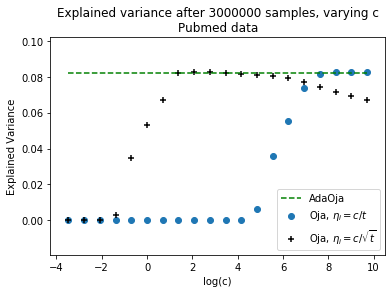

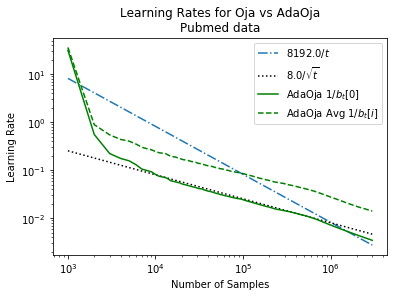

In [19]:
pm_lr = pf.compare_lr(base=2., lower=-5, upper=15)
pm_lr.run_cval_blocklist(pm_SpX, k, xnorm2=pm_norm2)
pm_lr.plot_cval_acc('Pubmed data', 'pm_cvals.svg')
pm_lr.plot_bvals('Pubmed data', 'pm_lr.svg')

In [ ]:
# Plot comparison of AdaOja, HPCA and SPM convergence for B=100
adaoja_pm, hpca_pm, spm_pm = dssb.run_sim_blocklist(pm_SpX, k, xnorm2=pm_norm2)
pf.plot_hpca_ada(adaoja_pm, hpca_pm, spm_pm, 'Pubmed')

In [ ]:
# Plot comparison of AdaOja, HPCA and SPM convergence for B=1000
# Note it is faster to simply reload the dataset as a set of size 1000 blocks
pm_n, pm_d, pm_nnz, pm_dense, pm_SpX, pm_norm2 = dssb.get_bagXblocks('docword.pubmed.txt', B=1000, block_total=300)
adaoja_pm, hpca_pm, spm_pm = dssb.run_sim_blocklist(pm_SpX, k, xnorm2=pm_norm2)
pf.plot_hpca_ada(adaoja_pm, hpca_pm, spm_pm, 'Pubmed')

# CIFAR

In [3]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
# Load the CIFAR data
db = []
for i in range(1, 6):
    db.append(unpickle('data_batch_' + str(i))[b'data'])
CIFAR = np.vstack(db)

# Centralize the CIFAR data
CIFAR_sc = CIFAR - CIFAR.mean(axis=0)
CIFAR_norm2 = la.norm(CIFAR_sc, ord='fro')**2
v_CIFAR = la.eigh(np.cov(CIFAR.T))[1][:,::-1]

In [ ]:
# Compare the final explained variance achieved by Oja's method for 
# eta_i = c/t, c/sqrt(t) to AdaOja and the offline explained variance.
# Here k ranges from 1 to 10
B = 10
CIFAR_lr = pf.compare_lr(base=5., lower=-15, upper=5)
for k in range(1,11):
    CIFAR_lr.run_cval_fullX(CIFAR_sc, k, B, Sparse=False, xnorm2=CIFAR_norm2)
    CIFAR_evar = expvar(CIFAR_sc, v_CIFAR[:,:k], xnorm2=CIFAR_norm2)
    CIFAR_lr.plot_cval_acc('CIFAR, k=' + str(k), 'CIFAR_cvals_k' + str(k) + '.svg', true_evar = CIFAR_evar)
    CIFAR_lr.plot_bvals('CIFAR, k=' + str(k), 'CIFAR_lr_k' + str(k) + '.svg')  
    

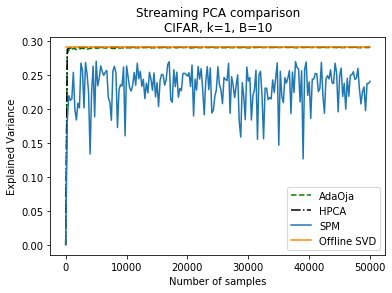

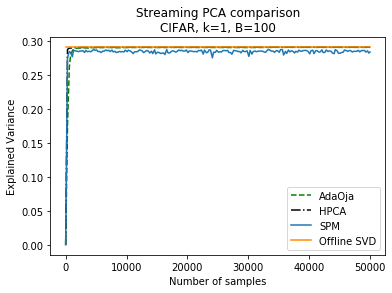

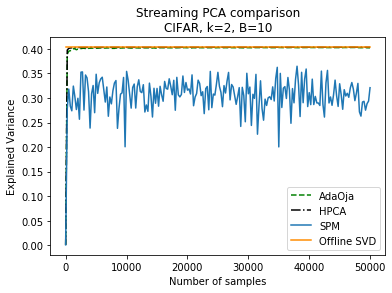

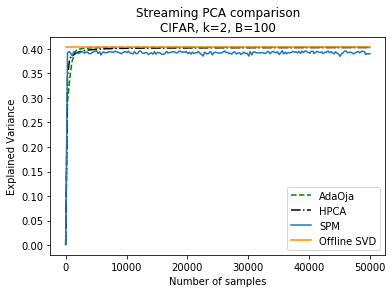

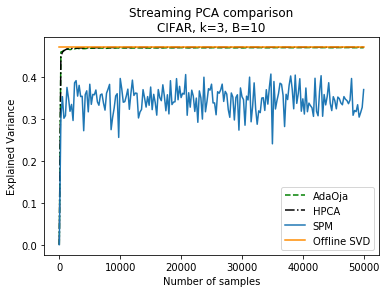

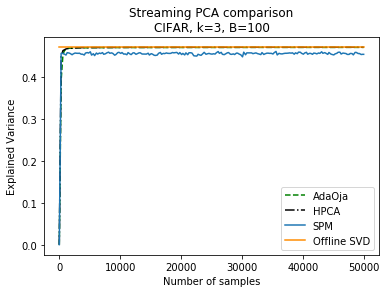

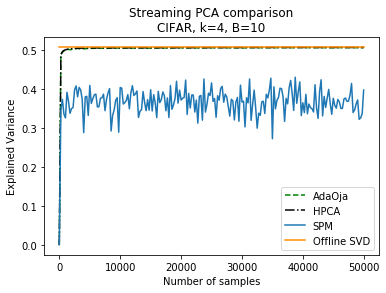

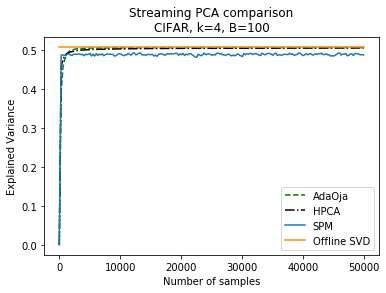

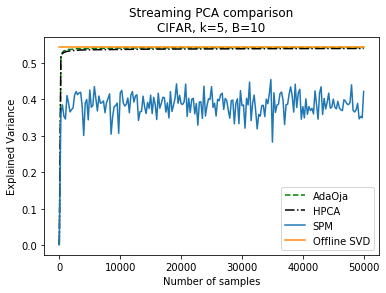

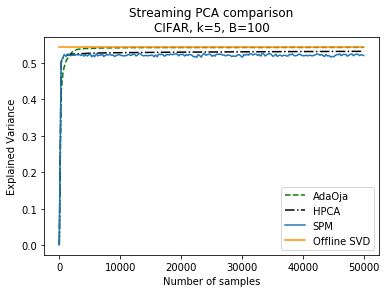

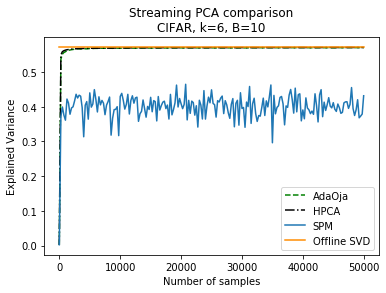

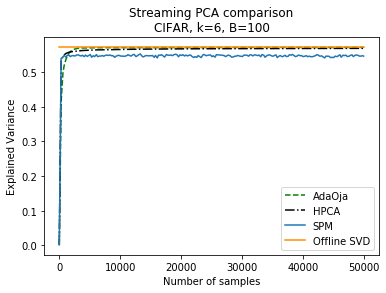

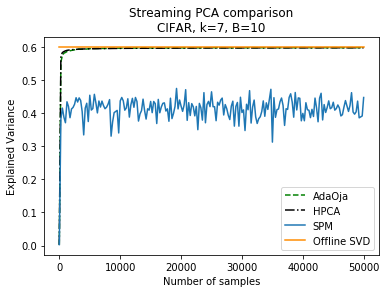

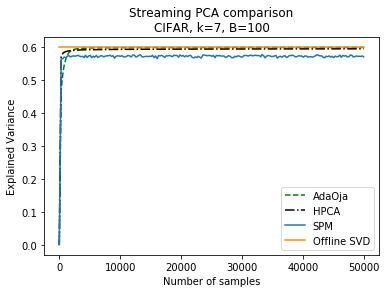

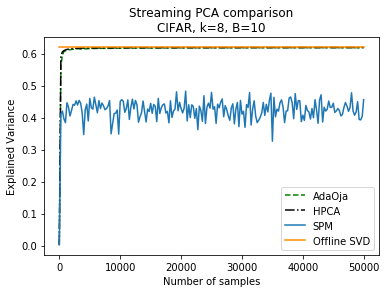

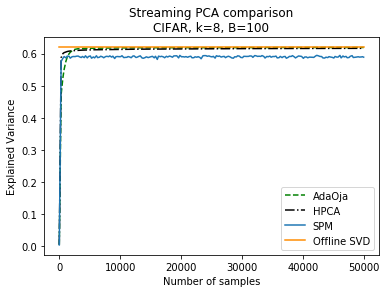

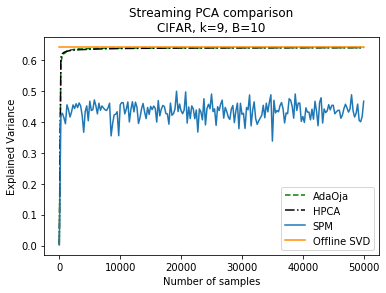

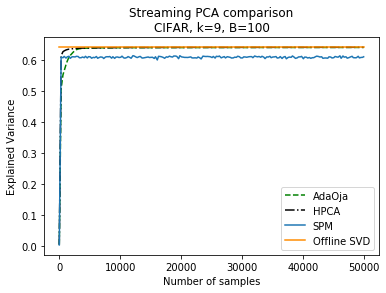

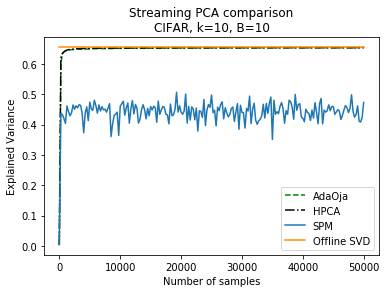

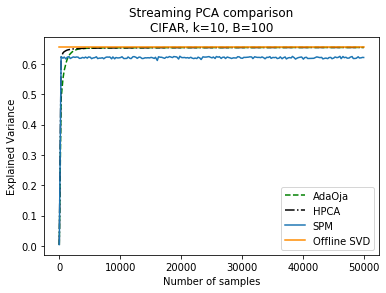

In [5]:
# Plot comparison of AdaOja, HPCA and SPM convergence for B=10, 100; k=1...10
for k in range(1, 11):
    for B in [10, 100]:
        ada_CIFAR, hpca_CIFAR, spm_CIFAR = dssb.run_sim_fullX(CIFAR_sc, k, B=B, Sparse=False, xnorm2 = CIFAR_norm2, num_acc=200)
        CIFAR_evar = expvar(CIFAR_sc, v_CIFAR[:,:k], xnorm2=CIFAR_norm2)
        pf.plot_hpca_ada(ada_CIFAR, hpca_CIFAR, spm_CIFAR, 'CIFAR', true_evar=CIFAR_evar)